In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
loan_data = pd.read_csv('/content/drive/MyDrive/Credit_Risk_Modeling/loan_data_2007_2014.csv')

<ipython-input-3-a3f5210a7a7b>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('/content/drive/MyDrive/Credit_Risk_Modeling/loan_data_2007_2014.csv')


In [4]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_data.shape

(466285, 75)

In [6]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

**There are columns with missing values**

In [8]:
total=loan_data.isnull().sum().sort_values(ascending=False)
percent=(loan_data.isnull().sum()/loan_data.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_values.head(50)

,total,percent
inq_last_12m,466285,1.000000
total_bal_il,466285,1.000000
dti_joint,466285,1.000000
verification_status_joint,466285,1.000000
annual_inc_joint,466285,1.000000
open_acc_6m,466285,1.000000
open_il_6m,466285,1.000000
open_il_12m,466285,1.000000
open_il_24m,466285,1.000000
mths_since_rcnt_il,466285,1.000000


To fill out misisng values of annual income we are going to take the mean income of each zip code and profession and fill the missing values with corresponding mean income.

In [9]:
loan_data_income_grouped = loan_data.groupby(['zip_code', 'emp_title']).agg({'annual_inc':'mean'}).reset_index()
loan_data_income_grouped

,zip_code,emp_title,annual_inc
0,007xx,Passaic Board of Education,155000.0
1,007xx,QASpecialist,75000.0
2,008xx,Operations Manager,92000.0
3,010xx,A/R Bookkeeping Supervisor,45000.0
4,010xx,ABB Inc.,90000.0
...,...,...,...
367726,999xx,alaska marine highway,52000.0
367727,999xx,janitorial,64000.0
367728,999xx,ketchikan gateway borough,91000.0
367729,999xx,line cook,38000.0


In [10]:
loan_data_merged = loan_data.merge(
    loan_data_income_grouped,
    on=['zip_code', 'emp_title'],
    how='left',
    suffixes=('', '_mean')
)

loan_data['annual_inc'] = loan_data['annual_inc'].fillna(loan_data_merged['annual_inc_mean'])
loan_data.drop(columns=['annual_inc_mean'], inplace=True, errors='ignore')

In [11]:
loan_data['annual_inc'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 466285 entries, 0 to 466284
Series name: annual_inc
Non-Null Count   Dtype  
--------------   -----  
466281 non-null  float64
dtypes: float64(1)
memory usage: 3.6 MB


Getting the mean annual income by zip_code and profession did not work. Let's try getting the mean annual income only by zip code.

In [12]:
loan_data_income_grouped = loan_data.groupby(['zip_code']).agg({'annual_inc':'mean'}).reset_index()
loan_data_income_grouped

,zip_code,annual_inc
0,007xx,99333.333333
1,008xx,92000.000000
2,010xx,68263.547146
3,011xx,65868.243223
4,012xx,69584.773039
...,...,...
883,995xx,78348.651583
884,996xx,75621.640149
885,997xx,74962.684649
886,998xx,70623.858586


In [13]:
loan_data_merged = loan_data.merge(
    loan_data_income_grouped,
    on=['zip_code'],
    how='left',
    suffixes=('', '_mean')
)

loan_data['annual_inc'] = loan_data['annual_inc'].fillna(loan_data_merged['annual_inc_mean'])
loan_data.drop(columns=['annual_inc_mean'], inplace=True, errors='ignore')

In [14]:
loan_data['annual_inc'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 466285 entries, 0 to 466284
Series name: annual_inc
Non-Null Count   Dtype  
--------------   -----  
466285 non-null  float64
dtypes: float64(1)
memory usage: 3.6 MB


In [15]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

### The other missing values such as -
### earlist_cr_line- if no record of when the credit line first became available, we can assume 0 month since earliest credit line.
### acc_now_delinq - we can assume that the number accounts on which the borrower is now delinquent is 0.
### total_acc - we can assume The total number of credit lines currently in the borrower's credit file is 0.

#### similarly pub_rec (Number of derogatory public records), open_acc(The number of open credit lines in the borrower's credit file), inq_last_6mths (The number of inquiries in past 6 months (excluding auto and mortgage inquiries)), delinq_2yrs(The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years), emp_length (Employment length in years).

**Will convert emp_length from category to int**

In [16]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '', regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', '0', regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', '0', regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '', regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '', regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('\+', '', regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].replace('', '0')

In [17]:
type(loan_data['emp_length_int'][0])

str

In [18]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [19]:
type(loan_data['emp_length_int'][0])

numpy.float64

We have earliest_cr_line. The month the borrower's earliest reported credit line was opened
We can create how long has it been since the earliest credit line.
Assuming we are in December 2017

In [20]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [21]:
loan_data['mths_since_earliest_cr_line'] = (
    (pd.to_datetime('2017-12-01').year - loan_data['earliest_cr_line_date'].dt.year) * 12 +
    (pd.to_datetime('2017-12-01').month - loan_data['earliest_cr_line_date'].dt.month)
)


In [22]:
loan_data['mths_since_earliest_cr_line'].describe()

,mths_since_earliest_cr_line
count,466256.000000
mean,239.482430
std,93.974829
min,-612.000000
25%,183.000000
50%,225.000000
75%,285.000000
max,587.000000


From the descriptive statistics, we can see that the minimum value is -612. Since the data is upto 2014 and we are assuming that today's date is December 2017, there cannot be any earliest_cr_line after December 2014. Will have a look at how many negative mths_since_earliest_cr_line there are

In [23]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [24]:
loan_data['mths_since_earliest_cr_line'].max()

587.0

In [25]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

<ipython-input-25-60169add49d1>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()
<ipython-input-25-60169a

Converting "term" as in loan terms into int.  

In [26]:
loan_data['term'].describe()

,term
count,466285
unique,2
top,36 months
freq,337953


In [27]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [28]:
loan_data['term_int'][0]

' 36'

In [29]:
type(loan_data['term_int'][12])

str

In [30]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
loan_data['term_int'][12]

36

There is the issue_d column which represents on which month the loan was funded. Going to create a feature that represents how long it has been since the loan has been granted.

In [31]:
loan_data['issue_d'].head()

,issue_d
0,Dec-11
1,Dec-11
2,Dec-11
3,Dec-11
4,Dec-11


In [32]:
loan_data['issue_d'].tail()

,issue_d
466280,Jan-14
466281,Jan-14
466282,Jan-14
466283,Jan-14
466284,Jan-14


In [33]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
loan_data['issue_d_date'].head()

,issue_d_date
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
4,2011-12-01


In [34]:
loan_data['issue_d_date'].tail()

,issue_d_date
466280,2014-01-01
466281,2014-01-01
466282,2014-01-01
466283,2014-01-01
466284,2014-01-01


In [35]:
loan_data['mths_since_issue_d'] = (
    (pd.to_datetime('2017-12-01').year - loan_data['issue_d_date'].dt.year) * 12 +
    (pd.to_datetime('2017-12-01').month - loan_data['issue_d_date'].dt.month)
)

In [36]:
loan_data['mths_since_issue_d'].describe()

,mths_since_issue_d
count,466285.000000
mean,51.255187
std,14.340154
min,36.000000
25%,41.000000
50%,47.000000
75%,57.000000
max,126.000000


There are different grades of the laons which had been assigned by Lending Club. We would want to analyze if population from a certan loan grade are more prone to not defaulting.

Also would like to create dummy variables for other categorical variables.

In [37]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [38]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [39]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [40]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

**Preparing target variable.**

### The column loan_status has the following values -
current, fully paid, charged off,late(31-120 days), in grace period, Does not meet the credit policy. Status:Fully Paid, Late (16-30 days), Default, Does not meet the credit policy. Status:Charged Off.

### From here, need to work out which category falls under good (not defaulting on loan) and which categiry fall under bad (defaulting on loan)


In [41]:
loan_data['loan_status'].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


Getting the proportion of each category of loan_status

In [42]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

,count
loan_status,
Current,0.480878
Fully Paid,0.396193
Charged Off,0.091092
Late (31-120 days),0.014798
In Grace Period,0.006747
Does not meet the credit policy. Status:Fully Paid,0.004263
Late (16-30 days),0.002612
Default,0.001784
Does not meet the credit policy. Status:Charged Off,0.001632


In [43]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

In [44]:
loan_data.shape

(466285, 208)

**Target variable is whether teh individual has defaulted or not (not default = 1, default = 0)**

In [45]:
predictors = loan_data.drop('good_bad', axis =1)
target = loan_data['good_bad']

In [46]:
print('Shape of predictor', predictors.shape)
print('Shape of target', target.shape)

Shape of predictor (466285, 207)
Shape of target (466285,)


Calculating WoE to understand the relationship between target and the categories of the variable of interest.
Calculating Information value (IV) to understand the relationship between target and variabel of interest.

In [47]:
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [48]:
df_temp = woe_discrete(predictors, 'grade', target)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129,-1.144166,NaN,NaN,0.290782
1,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628,-0.952214,0.036858,0.191952,0.290782
2,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635,-0.678466,0.046529,0.273748,0.290782
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460,-0.395001,0.040665,0.283465,0.290782
4,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216,-0.055251,0.039291,0.339750,0.290782
5,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093,0.364043,0.036229,0.419294,0.290782
6,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840,1.114730,0.039878,0.750686,0.290782


Plotting the WoE

In [49]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']

    plt.figure(figsize=(18, 6))

    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')

    plt.xlabel(df_WoE.columns[0])

    plt.ylabel('Weight of Evidence')

    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))

    plt.xticks(rotation = rotation_of_x_axis_labels)


**Grade A and grade B have higher percentage of "good" outcomes.**

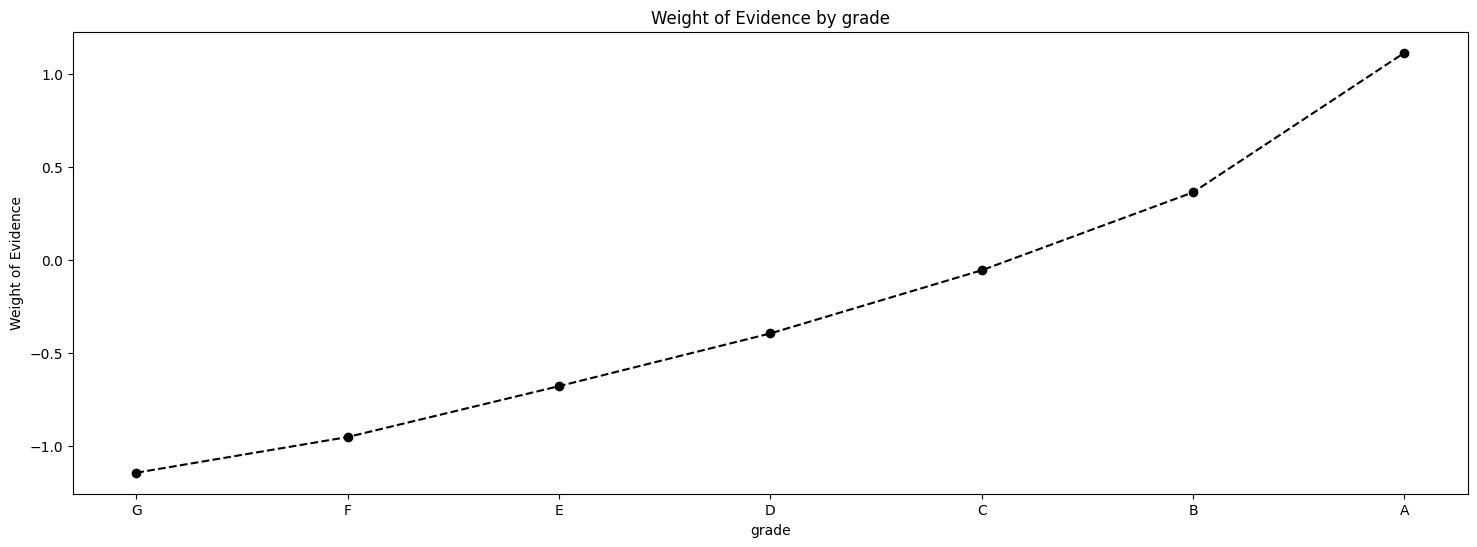

In [50]:
plot_by_woe(df_temp)

In [51]:
predictors['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,235875
RENT,188473
OWN,41704
OTHER,182
NONE,50
ANY,1


In [52]:
df_temp = woe_discrete(predictors, 'home_ownership', target)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,182,0.791209,0.000390,144.0,38.0,0.000347,0.000746,-0.765617,NaN,NaN,inf
1,NONE,50,0.840000,0.000107,42.0,8.0,0.000101,0.000157,-0.439616,0.048791,0.326001,inf
2,RENT,188473,0.873897,0.404201,164706.0,23767.0,0.396579,0.466312,-0.161980,0.033897,0.277636,inf
3,OWN,41704,0.891737,0.089439,37189.0,4515.0,0.089544,0.088585,0.010764,0.017840,0.172744,inf
4,MORTGAGE,235875,0.904017,0.505860,213235.0,22640.0,0.513427,0.444200,0.144832,0.012280,0.134069,inf
5,ANY,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.095983,inf,inf


**Those who have a Mortgage have a higher % of good outcomes. Those who own a house have equal % of good and bad outcomes.**

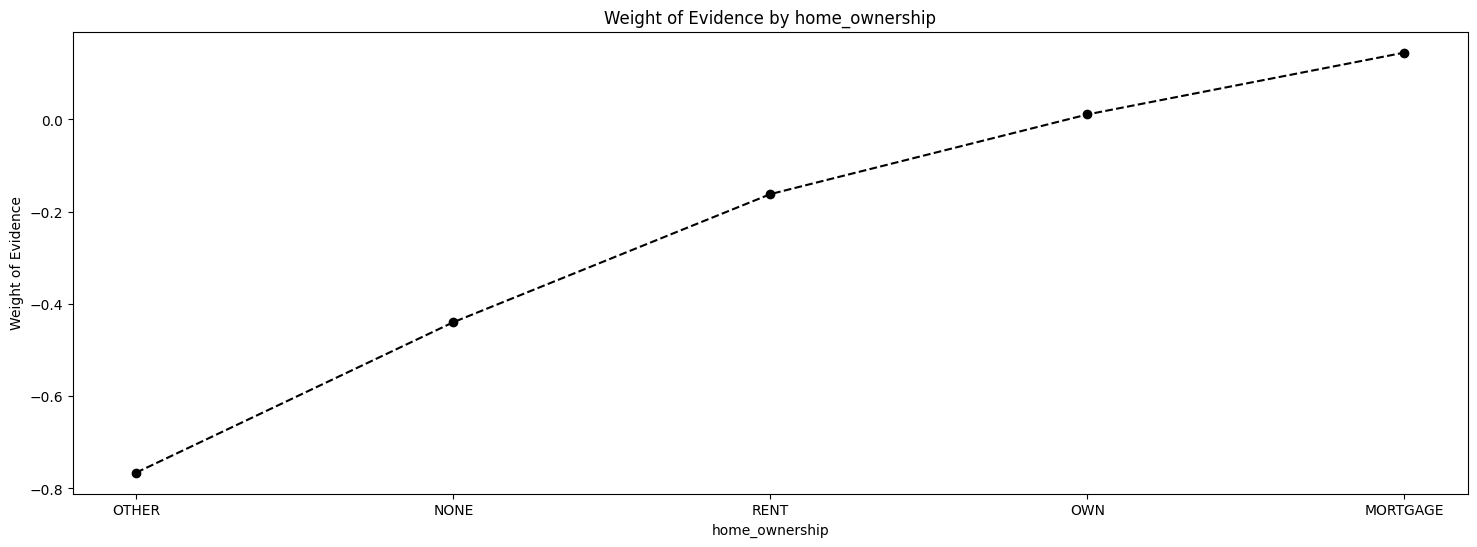

In [53]:
plot_by_woe(df_temp)

Rent, None, Other category have negative WoE meaning there is higher % of bad outcomes. There is only 1 person belonging to "ANY" category.

There is only a small number of observations for Other, None,Any as indicated by prop_n_obs from above.

The other riskiest category is RENT. Combining Rent, Other, None, Any together.

In [54]:
predictors['home_ownership:RENT_OTHER_NONE_ANY'] = sum([predictors['home_ownership:RENT'], predictors['home_ownership:OTHER'],
                                                      predictors['home_ownership:NONE'],predictors['home_ownership:ANY']])

In [55]:
predictors['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [56]:
predictors['addr_state'].value_counts()

,count
addr_state,
CA,71450
NY,40242
TX,36439
FL,31637
IL,18612
NJ,18061
PA,16424
OH,15237
GA,14975


In [57]:
df_temp = woe_discrete(predictors, 'addr_state', target)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,14,0.428571,0.000030,6.0,8.0,0.000014,0.000157,-2.385526,NaN,NaN,inf
1,IA,14,0.785714,0.000030,11.0,3.0,0.000026,0.000059,-0.798561,3.571429e-01,1.586965,inf
2,NV,6519,0.862862,0.013981,5625.0,894.0,0.013544,0.017540,-0.258574,7.714812e-02,0.539987,inf
3,HI,2487,0.873743,0.005334,2173.0,314.0,0.005232,0.006161,-0.163373,1.088106e-02,0.095201,inf
4,FL,31637,0.874640,0.067849,27671.0,3966.0,0.066626,0.077814,-0.155217,8.969866e-04,0.008156,inf
5,AL,5853,0.876474,0.012552,5130.0,723.0,0.012352,0.014185,-0.138392,1.833151e-03,0.016825,inf
6,NY,40242,0.883182,0.086303,35541.0,4701.0,0.085576,0.092234,-0.074932,6.708147e-03,0.063460,inf
7,LA,5489,0.883403,0.011772,4849.0,640.0,0.011675,0.012557,-0.072784,2.214196e-04,0.002148,inf
8,NM,2588,0.884467,0.005550,2289.0,299.0,0.005511,0.005866,-0.062417,1.063600e-03,0.010367,inf
9,OK,4117,0.884625,0.008829,3642.0,475.0,0.008769,0.009320,-0.060871,1.579570e-04,0.001547,inf


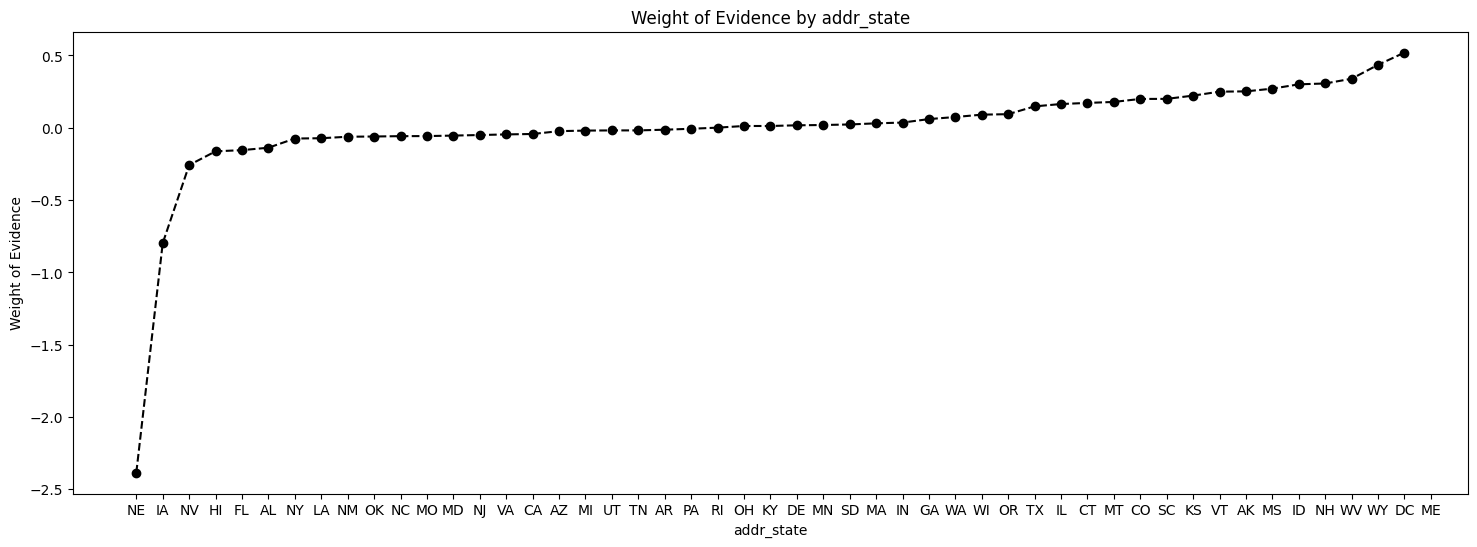

In [58]:
plot_by_woe(df_temp)

NE and IA has low WoE and ME has high WoE. From the descriptive statistics above, there are very low number of observations in those categories.

It is likely that the low number of observations is the reason for their extreme WoE values.

No data from North Dakota (ND). Going to add a category for ND in case there are borrowers from there later.

In [59]:
if ['addr_state:ND'] in predictors.columns.values:
    pass
else:
    predictors['addr_state:ND'] = 0

In [60]:
predictors['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([predictors['addr_state:ND'], predictors['addr_state:NE'],
                                              predictors['addr_state:IA'], predictors['addr_state:NV'],
                                              predictors['addr_state:FL'],
                                                          predictors['addr_state:AL']])

predictors['addr_state:NM_VA'] = sum([predictors['addr_state:NM'], predictors['addr_state:VA']])

predictors['addr_state:OK_TN_MO_LA_MD_NC'] = sum([predictors['addr_state:OK'], predictors['addr_state:TN'],
                                              predictors['addr_state:MO'], predictors['addr_state:LA'],
                                              predictors['addr_state:MD'], predictors['addr_state:NC']])

predictors['addr_state:UT_KY_AZ_NJ'] = sum([predictors['addr_state:UT'], predictors['addr_state:KY'],
                                              predictors['addr_state:AZ'], predictors['addr_state:NJ']])

predictors['addr_state:AR_MI_PA_OH_MN'] = sum([predictors['addr_state:AR'], predictors['addr_state:MI'],
                                              predictors['addr_state:PA'], predictors['addr_state:OH'],
                                              predictors['addr_state:MN']])

predictors['addr_state:RI_MA_DE_SD_IN'] = sum([predictors['addr_state:RI'], predictors['addr_state:MA'],
                                              predictors['addr_state:DE'], predictors['addr_state:SD'],
                                              predictors['addr_state:IN']])

predictors['addr_state:GA_WA_OR'] = sum([predictors['addr_state:GA'], predictors['addr_state:WA'],
                                              predictors['addr_state:OR']])

predictors['addr_state:WI_MT'] = sum([predictors['addr_state:WI'], predictors['addr_state:MT']])

predictors['addr_state:IL_CT'] = sum([predictors['addr_state:IL'], predictors['addr_state:CT']])

predictors['addr_state:KS_SC_CO_VT_AK_MS'] = sum([predictors['addr_state:KS'], predictors['addr_state:SC'],
                                              predictors['addr_state:CO'], predictors['addr_state:VT'],
                                              predictors['addr_state:AK'], predictors['addr_state:MS']])

predictors['addr_state:WV_NH_WY_DC_ME_ID'] = sum([predictors['addr_state:WV'], predictors['addr_state:NH'],
                                              predictors['addr_state:WY'], predictors['addr_state:DC'],
                                              predictors['addr_state:ME'], predictors['addr_state:ID']])

In [61]:
df_temp = woe_discrete(predictors, 'verification_status', target)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,168055,0.872631,0.360413,146650.0,21405.0,0.353104,0.419969,-0.173420,NaN,NaN,0.020831
1,Source Verified,149993,0.895882,0.321677,134376.0,15617.0,0.323550,0.306408,0.054438,0.023251,0.227858,0.020831
2,Not Verified,148237,0.905921,0.317911,134291.0,13946.0,0.323346,0.273623,0.166972,0.010039,0.112535,0.020831


Cases where income source has not been verified has higher % of good outcomes.
Cases where income source has been verified has lower % of goodoutcomes.
This is counter intuitive

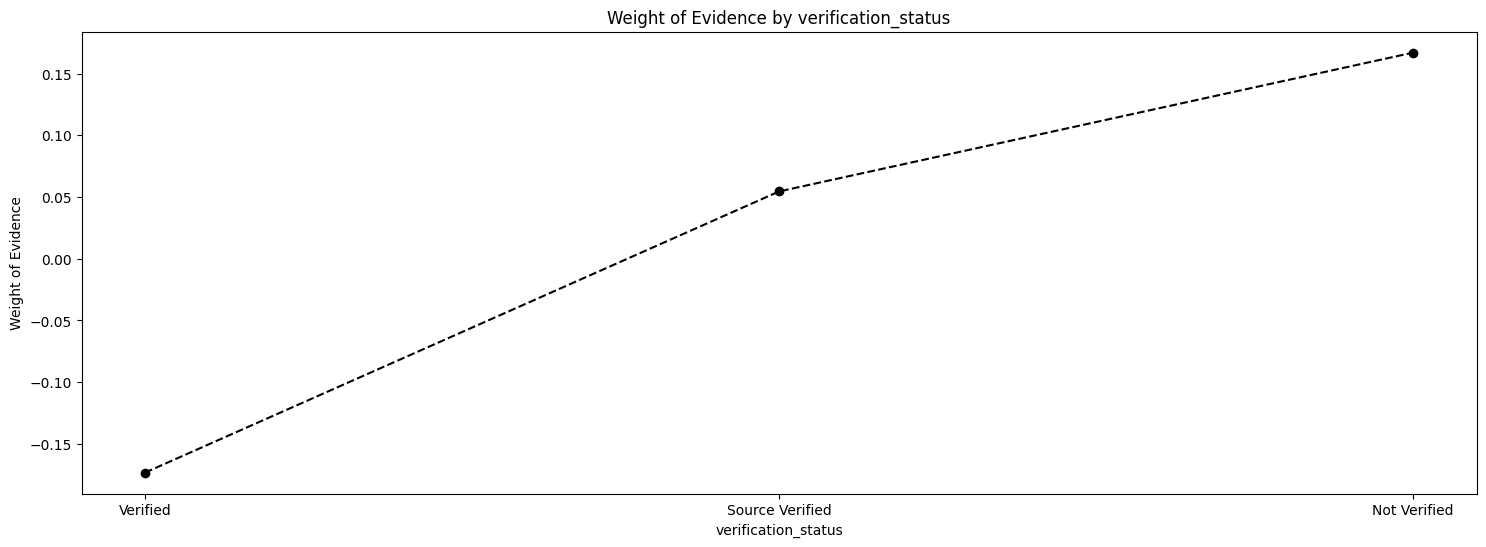

In [62]:
plot_by_woe(df_temp)

In [63]:
df_temp = woe_discrete(predictors, 'purpose', target)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,7013,0.784258,0.015040,5500.0,1513.0,0.013243,0.029685,-0.807190,NaN,NaN,0.03698
1,educational,422,0.791469,0.000905,334.0,88.0,0.000804,0.001727,-0.764040,0.007211,0.043151,0.03698
2,renewable_energy,351,0.846154,0.000753,297.0,54.0,0.000715,0.001059,-0.393096,0.054685,0.370944,0.03698
3,moving,2994,0.847361,0.006421,2537.0,457.0,0.006109,0.008966,-0.383790,0.001208,0.009306,0.03698
4,house,2269,0.859850,0.004866,1951.0,318.0,0.004698,0.006239,-0.283798,0.012489,0.099992,0.03698
5,other,23690,0.862009,0.050806,20421.0,3269.0,0.049170,0.064138,-0.265764,0.002159,0.018034,0.03698
6,medical,4602,0.866145,0.009870,3986.0,616.0,0.009597,0.012086,-0.230548,0.004136,0.035217,0.03698
7,wedding,2343,0.878361,0.005025,2058.0,285.0,0.004955,0.005592,-0.120843,0.012216,0.109704,0.03698
8,vacation,2487,0.882187,0.005334,2194.0,293.0,0.005283,0.005749,-0.084535,0.003826,0.036308,0.03698
9,debt_consolidation,274195,0.886690,0.588042,243126.0,31069.0,0.585399,0.609579,-0.040475,0.004503,0.044060,0.03698


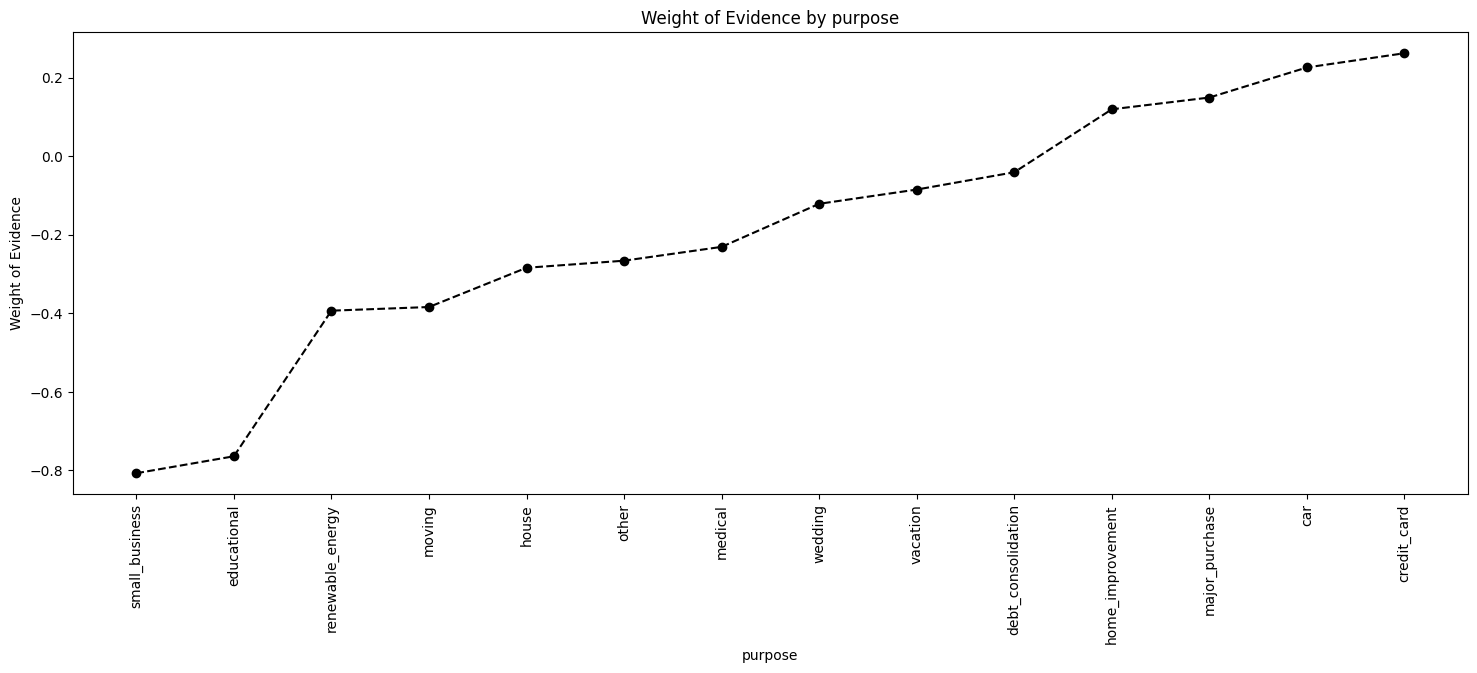

In [64]:
plot_by_woe(df_temp, 90)

In [65]:
predictors['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([predictors['purpose:educational'], predictors['purpose:small_business'],
                                                                 predictors['purpose:wedding'], predictors['purpose:renewable_energy'],
                                                                 predictors['purpose:moving'], predictors['purpose:house']])
predictors['purpose:oth__med__vacation'] = sum([predictors['purpose:other'], predictors['purpose:medical'],
                                             predictors['purpose:vacation']])
predictors['purpose:major_purch__car__home_impr'] = sum([predictors['purpose:major_purchase'], predictors['purpose:car'],
                                                        predictors['purpose:home_improvement']])

**Now processing continuous variables**

In [66]:
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [67]:
predictors['term_int'].unique()

array([36, 60])

In [68]:
df_temp = woe_ordered_continuous(predictors, 'term_int', target)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,337953,0.902915,0.724778,305143.0,32810.0,0.734723,0.643737,0.132203,NaN,NaN,0.03886
1,60,128332,0.858508,0.275222,110174.0,18158.0,0.265277,0.356263,-0.294894,0.044408,0.427097,0.03886


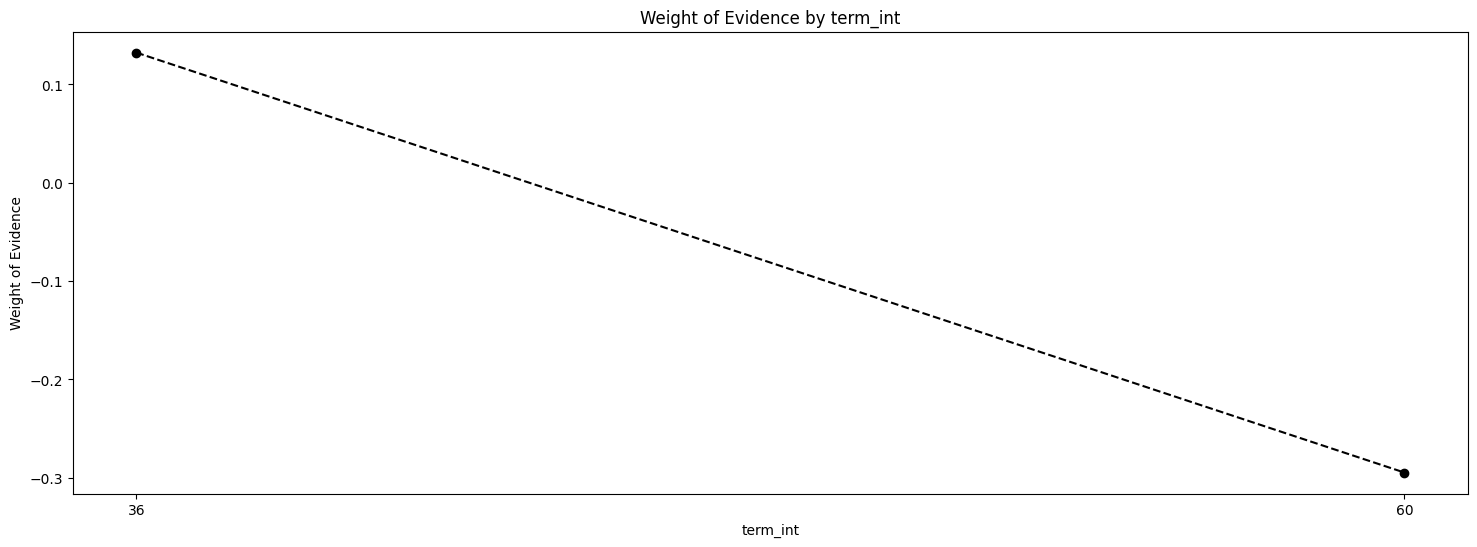

In [69]:
plot_by_woe(df_temp)

In [70]:
predictors['term:36'] = np.where((predictors['term_int'] == 36), 1, 0)
predictors['term:60'] = np.where((predictors['term_int'] == 60), 1, 0)

In [71]:
predictors['emp_length_int'].value_counts()

,count
emp_length_int,
10.0,150049
2.0,41373
3.0,36596
0.0,36265
5.0,30774
1.0,29622
4.0,28023
7.0,26180
6.0,26112


In [72]:
df_temp = woe_ordered_continuous(predictors, 'emp_length_int', target)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,36265,0.881015,0.081444,31950.0,4315.0,0.080459,0.089556,-0.107115,NaN,NaN,0.004826
1,1.0,29622,0.888124,0.066525,26308.0,3314.0,0.066251,0.068781,-0.037473,0.007109,0.069642,0.004826
2,2.0,41373,0.890242,0.092915,36832.0,4541.0,0.092754,0.094247,-0.015970,0.002119,0.021503,0.004826
3,3.0,36596,0.890480,0.082187,32588.0,4008.0,0.082066,0.083185,-0.013538,0.000237,0.002432,0.004826
4,4.0,28023,0.890411,0.062934,24952.0,3071.0,0.062836,0.063737,-0.014239,0.000068,0.000701,0.004826
5,5.0,30774,0.885033,0.069112,27236.0,3538.0,0.068588,0.073430,-0.068212,0.005379,0.053973,0.004826
6,6.0,26112,0.882889,0.058642,23054.0,3058.0,0.058057,0.063468,-0.089112,0.002144,0.020900,0.004826
7,7.0,26180,0.888655,0.058795,23265.0,2915.0,0.058588,0.060500,-0.032110,0.005766,0.057002,0.004826
8,8.0,22395,0.889931,0.050295,19930.0,2465.0,0.050190,0.051160,-0.019156,0.001275,0.012954,0.004826
9,9.0,17888,0.887914,0.040173,15883.0,2005.0,0.039998,0.041613,-0.039585,0.002017,0.020429,0.004826


In [73]:
predictors['emp_length:0'] = np.where(predictors['emp_length_int'].isin([0]), 1, 0)
predictors['emp_length:1'] = np.where(predictors['emp_length_int'].isin([1]), 1, 0)
predictors['emp_length:2-4'] = np.where(predictors['emp_length_int'].isin(range(2, 5)), 1, 0)
predictors['emp_length:5-6'] = np.where(predictors['emp_length_int'].isin(range(5, 7)), 1, 0)
predictors['emp_length:7-9'] = np.where(predictors['emp_length_int'].isin(range(7, 10)), 1, 0)
predictors['emp_length:10'] = np.where(predictors['emp_length_int'].isin([10]), 1, 0)

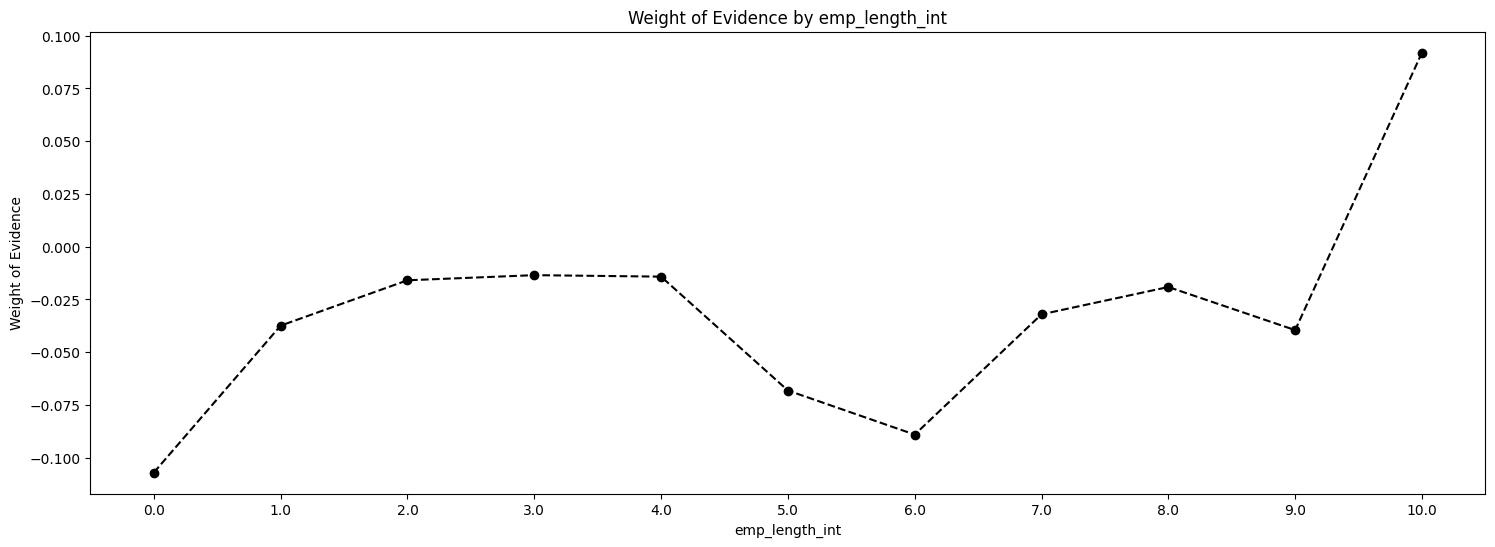

In [74]:
plot_by_woe(df_temp)

In [75]:
predictors['emp_length:0'] = np.where(predictors['emp_length_int'].isin([0]), 1, 0)
predictors['emp_length:1'] = np.where(predictors['emp_length_int'].isin([1]), 1, 0)
predictors['emp_length:2-4'] = np.where(predictors['emp_length_int'].isin(range(2, 5)), 1, 0)
predictors['emp_length:5-6'] = np.where(predictors['emp_length_int'].isin(range(5, 7)), 1, 0)
predictors['emp_length:7-9'] = np.where(predictors['emp_length_int'].isin(range(7, 10)), 1, 0)
predictors['emp_length:10'] = np.where(predictors['emp_length_int'].isin([10]), 1, 0)

In [76]:
predictors['mths_since_issue_d'].unique()

array([ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47],
      dtype=int32)

In [77]:
predictors['mths_since_issue_d_factor'] = pd.cut(predictors['mths_since_issue_d'], 50)

In [78]:
predictors['mths_since_issue_d_factor']

,mths_since_issue_d_factor
0,"(70.2, 72.0]"
1,"(70.2, 72.0]"
2,"(70.2, 72.0]"
3,"(70.2, 72.0]"
4,"(70.2, 72.0]"
...,...
466280,"(46.8, 48.6]"
466281,"(46.8, 48.6]"
466282,"(46.8, 48.6]"
466283,"(46.8, 48.6]"


In [79]:
df_temp = woe_ordered_continuous(predictors, 'mths_since_issue_d_factor', target)
df_temp

<ipython-input-66-d60b6f4ebf9c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
<ipython-input-66-d60b6f4ebf9c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",35361,0.942960,0.075836,33344.0,2017.0,0.080286,0.039574,0.707422,NaN,NaN,0.114799
1,"(37.8, 39.6]",49388,0.928809,0.105918,45872.0,3516.0,0.110451,0.068984,0.470687,0.014151,0.236736,0.114799
2,"(39.6, 41.4]",48120,0.917810,0.103199,44165.0,3955.0,0.106340,0.077598,0.315108,0.010999,0.155579,0.114799
3,"(41.4, 43.2]",36278,0.908705,0.077802,32966.0,3312.0,0.079376,0.064982,0.200080,0.009105,0.115028,0.114799
4,"(43.2, 45.0]",35584,0.902007,0.076314,32097.0,3487.0,0.077283,0.068415,0.121877,0.006698,0.078204,0.114799
5,"(45.0, 46.8]",15269,0.898487,0.032746,13719.0,1550.0,0.033033,0.030411,0.082683,0.003519,0.039194,0.114799
6,"(46.8, 48.6]",30648,0.897155,0.065728,27496.0,3152.0,0.066205,0.061843,0.068159,0.001332,0.014523,0.114799
7,"(48.6, 50.4]",28790,0.887843,0.061743,25561.0,3229.0,0.061546,0.063353,-0.028949,0.009312,0.097108,0.114799
8,"(50.4, 52.2]",25661,0.880207,0.055033,22587.0,3074.0,0.054385,0.060312,-0.103449,0.007636,0.074500,0.114799
9,"(52.2, 54.0]",22809,0.868298,0.048916,19805.0,3004.0,0.047686,0.058939,-0.211854,0.011910,0.108405,0.114799


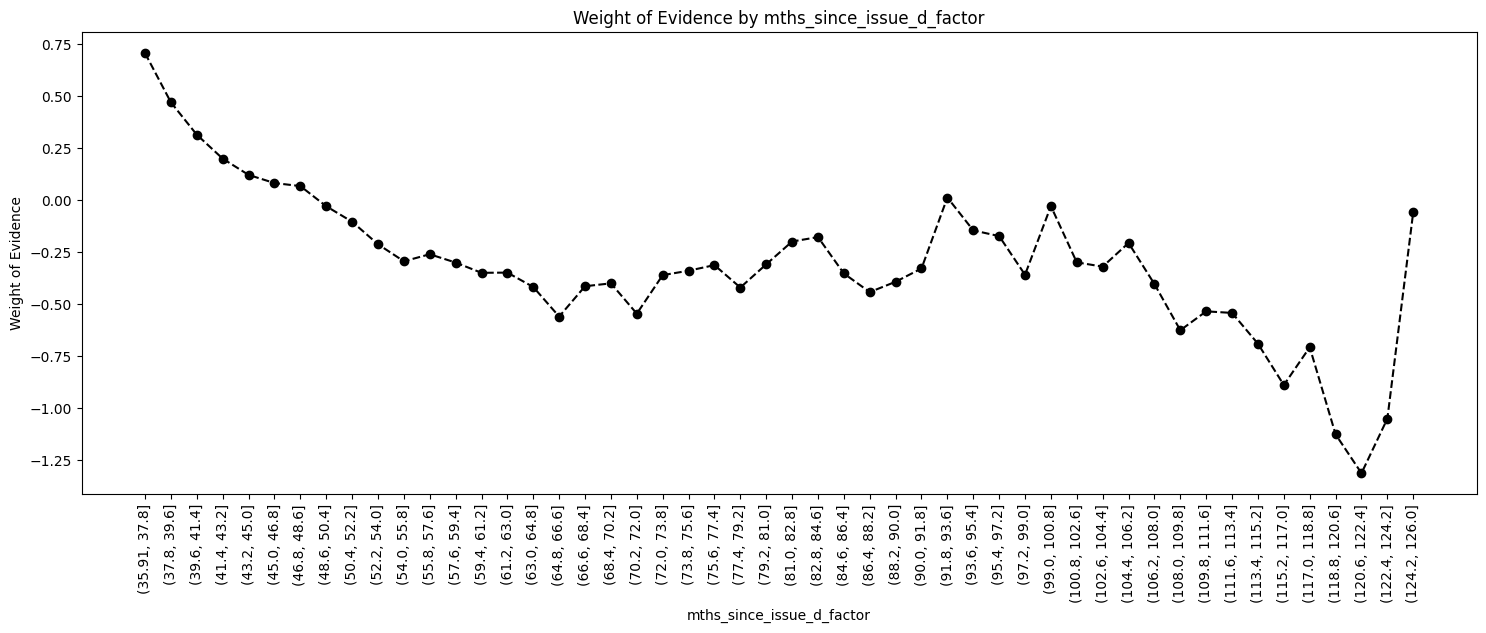

In [80]:
plot_by_woe(df_temp, 90)

**Months Since the loan had been issued**

In [81]:
predictors['mths_since_issue_d:<38'] = np.where(predictors['mths_since_issue_d'].isin(range(38)), 1, 0)
predictors['mths_since_issue_d:38-39'] = np.where(predictors['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
predictors['mths_since_issue_d:40-41'] = np.where(predictors['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
predictors['mths_since_issue_d:42-48'] = np.where(predictors['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
predictors['mths_since_issue_d:49-52'] = np.where(predictors['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
predictors['mths_since_issue_d:53-64'] = np.where(predictors['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
predictors['mths_since_issue_d:65-84'] = np.where(predictors['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
predictors['mths_since_issue_d:>84'] = np.where(predictors['mths_since_issue_d'].isin(range(85, int(predictors['mths_since_issue_d'].max()))), 1, 0)

**## For the other variables, skipping the WOE and IV part and going to the grouping part as it can be doen the same way**

In [82]:
predictors['int_rate:<9.548'] = np.where((predictors['int_rate'] <= 9.548), 1, 0)
predictors['int_rate:9.548-12.025'] = np.where((predictors['int_rate'] > 9.548) & (predictors['int_rate'] <= 12.025), 1, 0)
predictors['int_rate:12.025-15.74'] = np.where((predictors['int_rate'] > 12.025) & (predictors['int_rate'] <= 15.74), 1, 0)
predictors['int_rate:15.74-20.281'] = np.where((predictors['int_rate'] > 15.74) & (predictors['int_rate'] <= 20.281), 1, 0)
predictors['int_rate:>20.281'] = np.where((predictors['int_rate'] > 20.281), 1, 0)

**Months since the credit line became available for the person**

In [83]:
predictors['mths_since_earliest_cr_line:<140'] = np.where(predictors['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
predictors['mths_since_earliest_cr_line:141-164'] = np.where(predictors['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
predictors['mths_since_earliest_cr_line:165-247'] = np.where(predictors['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
predictors['mths_since_earliest_cr_line:248-270'] = np.where(predictors['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
predictors['mths_since_earliest_cr_line:271-352'] = np.where(predictors['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
predictors['mths_since_earliest_cr_line:>352'] = np.where(predictors['mths_since_earliest_cr_line'].isin(range(353, int(predictors['mths_since_earliest_cr_line'].max()))), 1, 0)

In [84]:
predictors['delinq_2yrs:0'] = np.where((predictors['delinq_2yrs'] == 0), 1, 0)
predictors['delinq_2yrs:1-3'] = np.where((predictors['delinq_2yrs'] >= 1) & (predictors['delinq_2yrs'] <= 3), 1, 0)
predictors['delinq_2yrs:>=4'] = np.where((predictors['delinq_2yrs'] >= 9), 1, 0)

In [85]:
predictors['inq_last_6mths:0'] = np.where((predictors['inq_last_6mths'] == 0), 1, 0)
predictors['inq_last_6mths:1-2'] = np.where((predictors['inq_last_6mths'] >= 1) & (predictors['inq_last_6mths'] <= 2), 1, 0)
predictors['inq_last_6mths:3-6'] = np.where((predictors['inq_last_6mths'] >= 3) & (predictors['inq_last_6mths'] <= 6), 1, 0)
predictors['inq_last_6mths:>6'] = np.where((predictors['inq_last_6mths'] > 6), 1, 0)

In [86]:
predictors['open_acc:0'] = np.where((predictors['open_acc'] == 0), 1, 0)
predictors['open_acc:1-3'] = np.where((predictors['open_acc'] >= 1) & (predictors['open_acc'] <= 3), 1, 0)
predictors['open_acc:4-12'] = np.where((predictors['open_acc'] >= 4) & (predictors['open_acc'] <= 12), 1, 0)
predictors['open_acc:13-17'] = np.where((predictors['open_acc'] >= 13) & (predictors['open_acc'] <= 17), 1, 0)
predictors['open_acc:18-22'] = np.where((predictors['open_acc'] >= 18) & (predictors['open_acc'] <= 22), 1, 0)
predictors['open_acc:23-25'] = np.where((predictors['open_acc'] >= 23) & (predictors['open_acc'] <= 25), 1, 0)
predictors['open_acc:26-30'] = np.where((predictors['open_acc'] >= 26) & (predictors['open_acc'] <= 30), 1, 0)
predictors['open_acc:>=31'] = np.where((predictors['open_acc'] >= 31), 1, 0)

In [87]:
predictors['pub_rec:0-2'] = np.where((predictors['pub_rec'] >= 0) & (predictors['pub_rec'] <= 2), 1, 0)
predictors['pub_rec:3-4'] = np.where((predictors['pub_rec'] >= 3) & (predictors['pub_rec'] <= 4), 1, 0)
predictors['pub_rec:>=5'] = np.where((predictors['pub_rec'] >= 5), 1, 0)

In [88]:
predictors['total_acc:<=27'] = np.where((predictors['total_acc'] <= 27), 1, 0)
predictors['total_acc:28-51'] = np.where((predictors['total_acc'] >= 28) & (predictors['total_acc'] <= 51), 1, 0)
predictors['total_acc:>=52'] = np.where((predictors['total_acc'] >= 52), 1, 0)

In [89]:
predictors['acc_now_delinq:0'] = np.where((predictors['acc_now_delinq'] == 0), 1, 0)
predictors['acc_now_delinq:>=1'] = np.where((predictors['acc_now_delinq'] >= 1), 1, 0)

In [90]:
predictors['total_rev_hi_lim:<=5K'] = np.where((predictors['total_rev_hi_lim'] <= 5000), 1, 0)
predictors['total_rev_hi_lim:5K-10K'] = np.where((predictors['total_rev_hi_lim'] > 5000) & (predictors['total_rev_hi_lim'] <= 10000), 1, 0)
predictors['total_rev_hi_lim:10K-20K'] = np.where((predictors['total_rev_hi_lim'] > 10000) & (predictors['total_rev_hi_lim'] <= 20000), 1, 0)
predictors['total_rev_hi_lim:20K-30K'] = np.where((predictors['total_rev_hi_lim'] > 20000) & (predictors['total_rev_hi_lim'] <= 30000), 1, 0)
predictors['total_rev_hi_lim:30K-40K'] = np.where((predictors['total_rev_hi_lim'] > 30000) & (predictors['total_rev_hi_lim'] <= 40000), 1, 0)
predictors['total_rev_hi_lim:40K-55K'] = np.where((predictors['total_rev_hi_lim'] > 40000) & (predictors['total_rev_hi_lim'] <= 55000), 1, 0)
predictors['total_rev_hi_lim:55K-95K'] = np.where((predictors['total_rev_hi_lim'] > 55000) & (predictors['total_rev_hi_lim'] <= 95000), 1, 0)
predictors['total_rev_hi_lim:>95K'] = np.where((predictors['total_rev_hi_lim'] > 95000), 1, 0)

In [91]:
predictors['annual_inc:<20K'] = np.where((predictors['annual_inc'] <= 20000), 1, 0)
predictors['annual_inc:20K-30K'] = np.where((predictors['annual_inc'] > 20000) & (predictors['annual_inc'] <= 30000), 1, 0)
predictors['annual_inc:30K-40K'] = np.where((predictors['annual_inc'] > 30000) & (predictors['annual_inc'] <= 40000), 1, 0)
predictors['annual_inc:40K-50K'] = np.where((predictors['annual_inc'] > 40000) & (predictors['annual_inc'] <= 50000), 1, 0)
predictors['annual_inc:50K-60K'] = np.where((predictors['annual_inc'] > 50000) & (predictors['annual_inc'] <= 60000), 1, 0)
predictors['annual_inc:60K-70K'] = np.where((predictors['annual_inc'] > 60000) & (predictors['annual_inc'] <= 70000), 1, 0)
predictors['annual_inc:70K-80K'] = np.where((predictors['annual_inc'] > 70000) & (predictors['annual_inc'] <= 80000), 1, 0)
predictors['annual_inc:80K-90K'] = np.where((predictors['annual_inc'] > 80000) & (predictors['annual_inc'] <= 90000), 1, 0)
predictors['annual_inc:90K-100K'] = np.where((predictors['annual_inc'] > 90000) & (predictors['annual_inc'] <= 100000), 1, 0)
predictors['annual_inc:100K-120K'] = np.where((predictors['annual_inc'] > 100000) & (predictors['annual_inc'] <= 120000), 1, 0)
predictors['annual_inc:120K-140K'] = np.where((predictors['annual_inc'] > 120000) & (predictors['annual_inc'] <= 140000), 1, 0)
predictors['annual_inc:>140K'] = np.where((predictors['annual_inc'] > 140000), 1, 0)

In [92]:
predictors['mths_since_last_delinq:Missing'] = np.where((predictors['mths_since_last_delinq'].isnull()), 1, 0)
predictors['mths_since_last_delinq:0-3'] = np.where((predictors['mths_since_last_delinq'] >= 0) & (predictors['mths_since_last_delinq'] <= 3), 1, 0)
predictors['mths_since_last_delinq:4-30'] = np.where((predictors['mths_since_last_delinq'] >= 4) & (predictors['mths_since_last_delinq'] <= 30), 1, 0)
predictors['mths_since_last_delinq:31-56'] = np.where((predictors['mths_since_last_delinq'] >= 31) & (predictors['mths_since_last_delinq'] <= 56), 1, 0)
predictors['mths_since_last_delinq:>=57'] = np.where((predictors['mths_since_last_delinq'] >= 57), 1, 0)

In [93]:
predictors['dti:<=1.4'] = np.where((predictors['dti'] <= 1.4), 1, 0)
predictors['dti:1.4-3.5'] = np.where((predictors['dti'] > 1.4) & (predictors['dti'] <= 3.5), 1, 0)
predictors['dti:3.5-7.7'] = np.where((predictors['dti'] > 3.5) & (predictors['dti'] <= 7.7), 1, 0)
predictors['dti:7.7-10.5'] = np.where((predictors['dti'] > 7.7) & (predictors['dti'] <= 10.5), 1, 0)
predictors['dti:10.5-16.1'] = np.where((predictors['dti'] > 10.5) & (predictors['dti'] <= 16.1), 1, 0)
predictors['dti:16.1-20.3'] = np.where((predictors['dti'] > 16.1) & (predictors['dti'] <= 20.3), 1, 0)
predictors['dti:20.3-21.7'] = np.where((predictors['dti'] > 20.3) & (predictors['dti'] <= 21.7), 1, 0)
predictors['dti:21.7-22.4'] = np.where((predictors['dti'] > 21.7) & (predictors['dti'] <= 22.4), 1, 0)
predictors['dti:22.4-35'] = np.where((predictors['dti'] > 22.4) & (predictors['dti'] <= 35), 1, 0)
predictors['dti:>35'] = np.where((predictors['dti'] > 35), 1, 0)

<ipython-input-93-49b05c56d3d3>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictors['dti:7.7-10.5'] = np.where((predictors['dti'] > 7.7) & (predictors['dti'] <= 10.5), 1, 0)
<ipython-input-93-49b05c56d3d3>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictors['dti:10.5-16.1'] = np.where((predictors['dti'] > 10.5) & (predictors['dti'] <= 16.1), 1, 0)
<ipython-input-93-49b05c56d3d3>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor 

In [94]:
predictors['mths_since_last_record:Missing'] = np.where((predictors['mths_since_last_record'].isnull()), 1, 0)
predictors['mths_since_last_record:0-2'] = np.where((predictors['mths_since_last_record'] >= 0) & (predictors['mths_since_last_record'] <= 2), 1, 0)
predictors['mths_since_last_record:3-20'] = np.where((predictors['mths_since_last_record'] >= 3) & (predictors['mths_since_last_record'] <= 20), 1, 0)
predictors['mths_since_last_record:21-31'] = np.where((predictors['mths_since_last_record'] >= 21) & (predictors['mths_since_last_record'] <= 31), 1, 0)
predictors['mths_since_last_record:32-80'] = np.where((predictors['mths_since_last_record'] >= 32) & (predictors['mths_since_last_record'] <= 80), 1, 0)
predictors['mths_since_last_record:81-86'] = np.where((predictors['mths_since_last_record'] >= 81) & (predictors['mths_since_last_record'] <= 86), 1, 0)
predictors['mths_since_last_record:>86'] = np.where((predictors['mths_since_last_record'] > 86), 1, 0)

<ipython-input-94-9b64072304f0>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictors['mths_since_last_record:Missing'] = np.where((predictors['mths_since_last_record'].isnull()), 1, 0)
<ipython-input-94-9b64072304f0>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictors['mths_since_last_record:0-2'] = np.where((predictors['mths_since_last_record'] >= 0) & (predictors['mths_since_last_record'] <= 2), 1, 0)
<ipython-input-94-9b64072304f0>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

In [95]:
loan_data_inputs= predictors

In [96]:
loan_data_concat = pd.concat([predictors, target], axis = 1)

In [97]:
loan_data_concat.shape

(466285, 317)

In [98]:
loan_data_concat.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_sinc

In [99]:
# loan_data_concat.to_csv('/content/drive/My Drive/loan_data_2007_2014_preprocessed.csv', index=False)

In [100]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data_concat.drop('good_bad', axis = 1), loan_data[['good_bad']])

In [101]:
print('loan_data_inputs_train', loan_data_inputs_train.shape)
print('loan_data_inputs_test', loan_data_inputs_test.shape)
print('loan_data_targets_train', loan_data_targets_train.shape)
print('loan_data_targets_test', loan_data_targets_test.shape)

loan_data_inputs_train (349713, 316)
loan_data_inputs_test (116572, 316)
loan_data_targets_train (349713, 1)
loan_data_targets_test (116572, 1)


In [102]:
# loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')

In [103]:
# loan_data_inputs_train.to_csv('/content/drive/My Drive/loan_data_inputs_train.csv', index=False)
# loan_data_inputs_test.to_csv('/content/drive/My Drive/loan_data_inputs_test.csv', index=False)
# loan_data_targets_train.to_csv('/content/drive/My Drive/loan_data_targets_train.csv', index=False)
# loan_data_targets_test.to_csv('/content/drive/My Drive/loan_data_targets_test.csv', index=False)